<a href="https://colab.research.google.com/github/laffertybrian/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Loading libraries and dataset

In [169]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

# Loading the dataset
space_df = pd.read_csv('/content/drive/MyDrive/07 Classification Models/nasa.csv')
space_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


###Exploring the dataset

In [101]:
# Checking for duplicated rows
space_df.duplicated().sum()

0

In [102]:
# Checking for missing data
space_df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [103]:
# Reviewing datatypes
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

>After reviewing the data there are multiple IDs, date, and redundant measurements that could be eliminated from the dataset. To get a general overview of the dataset I will use a correlation map.

###Deleting unnecessary columns

In [104]:
# Removing columns from the dataset
space_df.drop(columns=['Neo Reference ID', 'Name', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
                       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date', 'Epoch Date Close Approach', 'Relative Velocity km per hr',
                       'Miles per hour', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID', 'Orbit Determination Date',
                       'Orbiting Body', 'Equinox'], inplace = True)

>These columns were removed because they were redundant or irrelevant. I will review the remaining columns to determine if they will remain in the dataset.

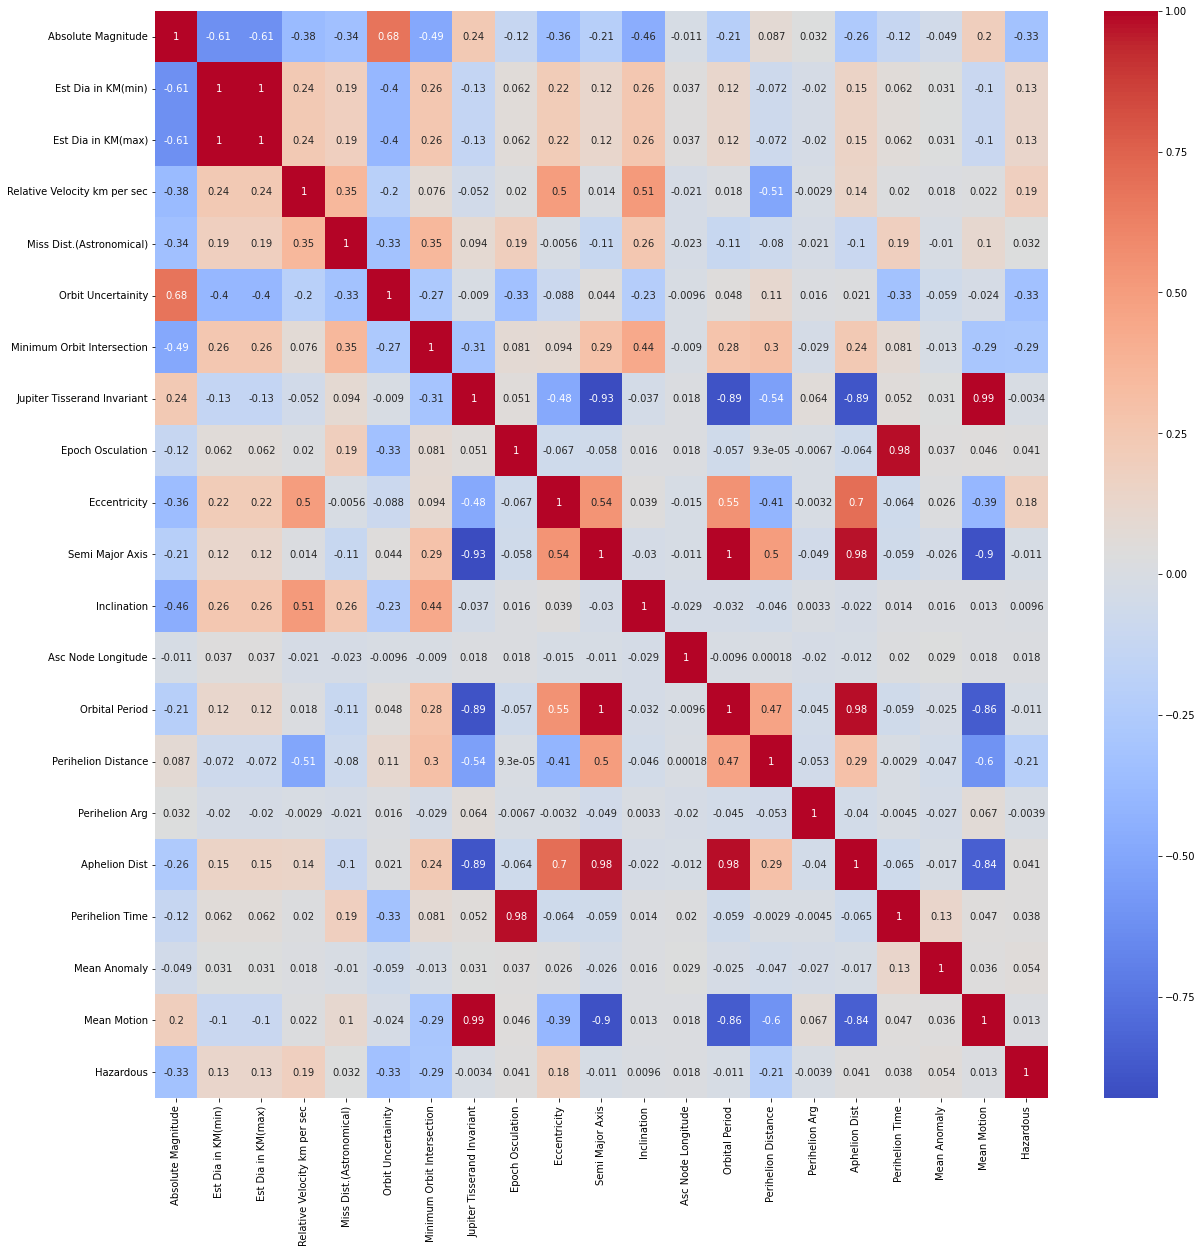

In [105]:
# Creating a second correlation plot to visualize the data
space_info_2 = space_df.corr()

# plotting the results
plt.figure(figsize=(20, 20))
sns.heatmap(space_info_2, cmap='coolwarm', annot = True);

###Column Review

In [106]:
# determining remaining columns
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Relative Velocity km per sec  4687 non-null   float64
 4   Miss Dist.(Astronomical)      4687 non-null   float64
 5   Orbit Uncertainity            4687 non-null   int64  
 6   Minimum Orbit Intersection    4687 non-null   float64
 7   Jupiter Tisserand Invariant   4687 non-null   float64
 8   Epoch Osculation              4687 non-null   float64
 9   Eccentricity                  4687 non-null   float64
 10  Semi Major Axis               4687 non-null   float64
 11  Inclination                   4687 non-null   float64
 12  Asc Node Longitude            4687 non-null   float64
 13  Orb

>I am reviewing the columns with a kernel density estimation plot. I selected this plot to visualize the distribution of data within the column. A KDE plot is simialr to a histogram, but without bins that can visually misrepresent the data.

count    4687.000000
mean       22.267865
std         2.890972
min        11.160000
25%        20.100000
50%        21.900000
75%        24.500000
max        32.100000
Name: Absolute Magnitude, dtype: float64

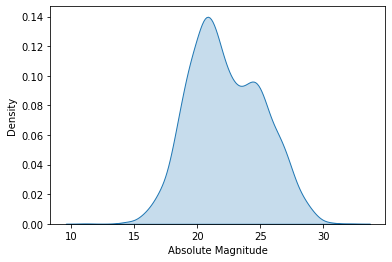

In [107]:
# Exploring absolute magnitude column
sns.kdeplot(space_df['Absolute Magnitude'], shade = True);
space_df['Absolute Magnitude'].describe()

count    4687.000000
mean        0.204604
std         0.369573
min         0.001011
25%         0.033462
50%         0.110804
75%         0.253837
max        15.579552
Name: Est Dia in KM(min), dtype: float64

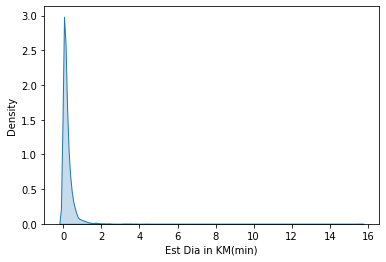

In [108]:
# Exploring est dia in km(min) column
sns.kdeplot(space_df['Est Dia in KM(min)'], shade=True);
space_df['Est Dia in KM(min)'].describe()

>This dataset is skewed to the right, but there is an outlier dramatically larger than the majortiy of the data.

count    4687.000000
mean        0.457509
std         0.826391
min         0.002260
25%         0.074824
50%         0.247765
75%         0.567597
max        34.836938
Name: Est Dia in KM(max), dtype: float64

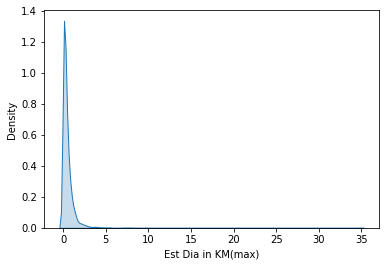

In [109]:
# Exploring est dia in km(max) column
sns.kdeplot(space_df['Est Dia in KM(max)'], shade = True);
space_df['Est Dia in KM(max)'].describe()

>This dataset is skewed to the right. It too has an outlier that is well above the mean of the dataset.

count    4687.000000
mean       13.970811
std         7.293223
min         0.335504
25%         8.432865
50%        12.917889
75%        18.077649
max        44.633747
Name: Relative Velocity km per sec, dtype: float64

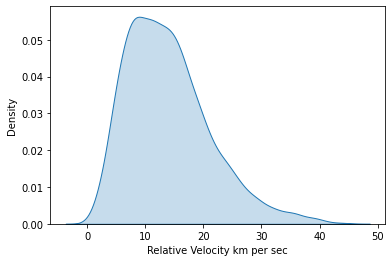

In [110]:
# Exploring relative velocity
sns.kdeplot(space_df['Relative Velocity km per sec'], shade = True);
space_df['Relative Velocity km per sec'].describe()

count    4687.000000
mean        0.256778
std         0.145798
min         0.000178
25%         0.133420
50%         0.265029
75%         0.384154
max         0.499884
Name: Miss Dist.(Astronomical), dtype: float64

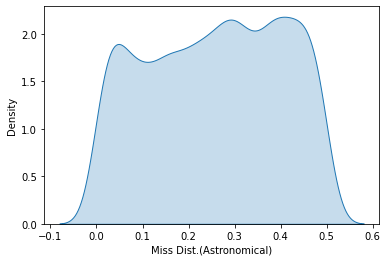

In [111]:
# Exploring miss dist astro column
sns.kdeplot(space_df['Miss Dist.(Astronomical)'], shade = True);
space_df['Miss Dist.(Astronomical)'].describe()

count    4687.000000
mean        3.516962
std         3.078307
min         0.000000
25%         0.000000
50%         3.000000
75%         6.000000
max         9.000000
Name: Orbit Uncertainity, dtype: float64

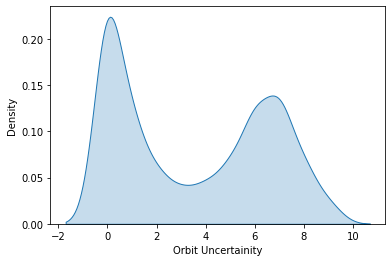

In [112]:
# Exploring orbit uncertainity
sns.kdeplot(space_df['Orbit Uncertainity'], shade = True);
space_df['Orbit Uncertainity'].describe()

>This column is interesting because of the bimodal distrubution of the data. The data shows two distinct peaks.

count    4687.000000
mean        0.082320
std         0.090300
min         0.000002
25%         0.014585
50%         0.047365
75%         0.123593
max         0.477891
Name: Minimum Orbit Intersection, dtype: float64

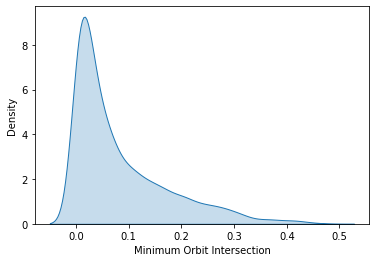

In [113]:
# Exploring minimum orbit intersection column
sns.kdeplot(space_df['Minimum Orbit Intersection'], shade = True);
space_df['Minimum Orbit Intersection'].describe()

>The data in this chart is skewed to the right, but does not have a dramatic outlier like previous data.

count    4687.000000
mean        5.056111
std         1.237818
min         2.196000
25%         4.049500
50%         5.071000
75%         6.019000
max         9.025000
Name: Jupiter Tisserand Invariant, dtype: float64

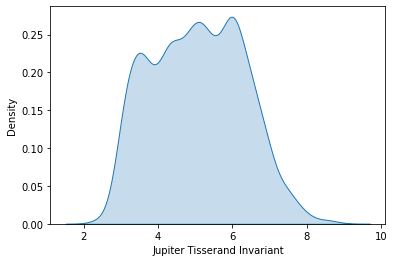

In [114]:
# Exploring Jupiter Tisserand Invariant column
sns.kdeplot(space_df['Jupiter Tisserand Invariant'], shade = True);
space_df['Jupiter Tisserand Invariant'].describe()

count    4.687000e+03
mean     2.457724e+06
std      9.202975e+02
min      2.450164e+06
25%      2.458000e+06
50%      2.458000e+06
75%      2.458000e+06
max      2.458020e+06
Name: Epoch Osculation, dtype: float64

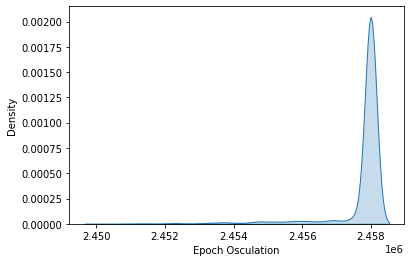

In [115]:
# Exploring Epoch Osculation column
sns.kdeplot(space_df['Epoch Osculation'], shade = True);
space_df['Epoch Osculation'].describe()

>This dataset is skewed to the left, but the range of the data is very narrow. The majority of the data is clustered around a single value.

count    4687.000000
mean        0.382569
std         0.180444
min         0.007522
25%         0.240858
50%         0.372450
75%         0.512411
max         0.960261
Name: Eccentricity, dtype: float64

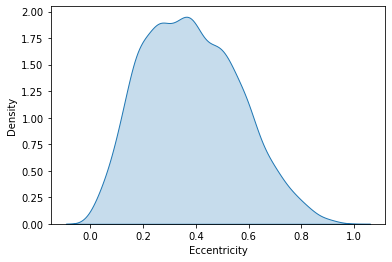

In [116]:
# Exploring Eccentricity column
sns.kdeplot(space_df['Eccentricity'], shade = True);
space_df['Eccentricity'].describe()

>This dataset has a relatively normal distrubution of values.

count    4687.000000
mean        1.400264
std         0.524154
min         0.615920
25%         1.000635
50%         1.240981
75%         1.678364
max         5.072008
Name: Semi Major Axis, dtype: float64

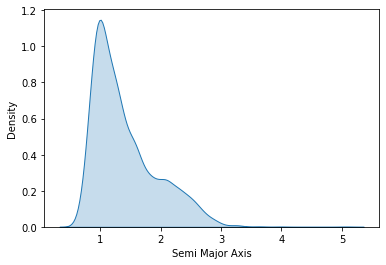

In [117]:
# Exploring Semi Major Axis column
sns.kdeplot(space_df['Semi Major Axis'], shade = True);
space_df['Semi Major Axis'].describe()

>This dataset is skewed to the right with a maximum value that is 3.5x the mean.

count    4687.000000
mean       13.373844
std        10.936227
min         0.014513
25%         4.962341
50%        10.311836
75%        19.511681
max        75.406667
Name: Inclination, dtype: float64

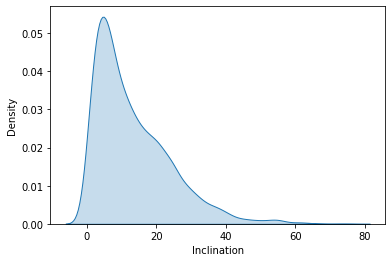

In [118]:
# Exploring Inclination column
sns.kdeplot(space_df['Inclination'], shade = True);
space_df['Inclination'].describe()

>This dataset is also skewed to the right with a tail that is over 5x the mean.

count    4687.000000
mean      172.157275
std       103.276777
min         0.001941
25%        83.081208
50%       172.625393
75%       255.026909
max       359.905890
Name: Asc Node Longitude, dtype: float64

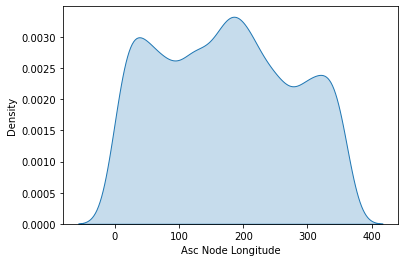

In [119]:
# Exploring the Asc Node Longitude column
sns.kdeplot(space_df['Asc Node Longitude'], shade = True);
space_df['Asc Node Longitude'].describe()

count    4687.000000
mean      635.582076
std       370.954727
min       176.557161
25%       365.605031
50%       504.947292
75%       794.195972
max      4172.231343
Name: Orbital Period, dtype: float64

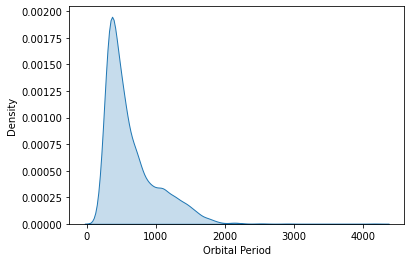

In [120]:
# Exploring Orbital Period column
sns.kdeplot(space_df['Orbital Period'], shade=True);
space_df['Orbital Period'].describe()

>This chart shows a right skew with an outlier over 6x the mean value of the column.

count    4687.000000
mean        0.813383
std         0.242059
min         0.080744
25%         0.630834
50%         0.833153
75%         0.997227
max         1.299832
Name: Perihelion Distance, dtype: float64

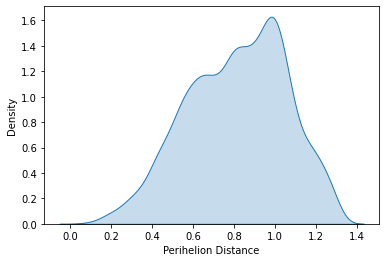

In [121]:
# Exploring the Perihelion Distance column
sns.kdeplot(space_df['Perihelion Distance'], shade=True)
space_df['Perihelion Distance'].describe()

count    4687.000000
mean      183.932151
std       103.513035
min         0.006918
25%        95.625916
50%       189.761641
75%       271.777557
max       359.993098
Name: Perihelion Arg, dtype: float64

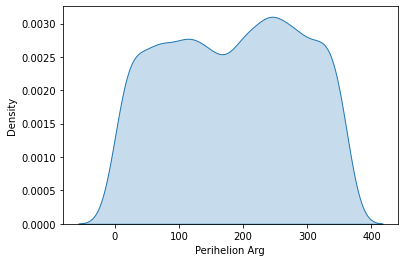

In [122]:
# Exploring the Perihelion Arg column
sns.kdeplot(space_df['Perihelion Arg'], shade=True)
space_df['Perihelion Arg'].describe()

count    4687.000000
mean        1.987144
std         0.951519
min         0.803765
25%         1.266059
50%         1.618195
75%         2.451171
max         8.983852
Name: Aphelion Dist, dtype: float64

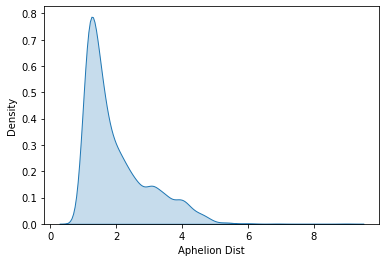

In [123]:
# Exploring the Aphelion Dist column
sns.kdeplot(space_df['Aphelion Dist'], shade=True)
space_df['Aphelion Dist'].describe()

>This dataset is skewed to the right with a tail extending close to 4.5x the mean value.

count    4.687000e+03
mean     2.457728e+06
std      9.442264e+02
min      2.450100e+06
25%      2.457815e+06
50%      2.457973e+06
75%      2.458108e+06
max      2.458839e+06
Name: Perihelion Time, dtype: float64

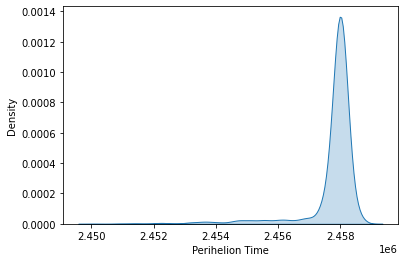

In [124]:
# Exploring the Perihelion Time column
sns.kdeplot(space_df['Perihelion Time'], shade=True)
space_df['Perihelion Time'].describe()

>This dataset is skewed to the left and is remarkably similar to the Epoch Osculation column.

count    4687.000000
mean      181.167927
std       107.501623
min         0.003191
25%        87.006918
50%       185.718889
75%       276.531946
max       359.917991
Name: Mean Anomaly, dtype: float64

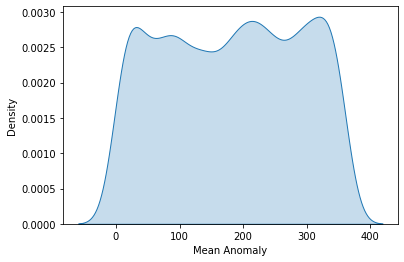

In [125]:
# Exploring the Mean Anomaly column
sns.kdeplot(space_df['Mean Anomaly'], shade=True)
space_df['Mean Anomaly'].describe()

count    4687.000000
mean        0.738242
std         0.342627
min         0.086285
25%         0.453289
50%         0.712946
75%         0.984669
max         2.039000
Name: Mean Motion, dtype: float64

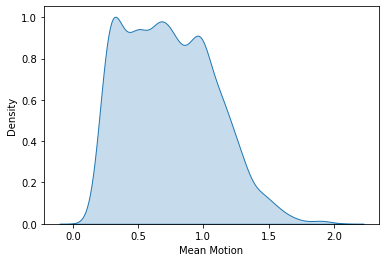

In [126]:
# Exploring Mean Motion column
sns.kdeplot(space_df['Mean Motion'], shade=True)
space_df['Mean Motion'].describe()

False    3932
True      755
Name: Hazardous, dtype: int64

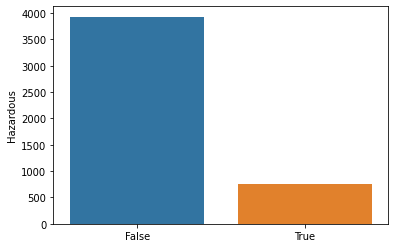

In [127]:
# Exploring Hazardous column
sns.barplot(x = ['False', 'True'], y = space_df['Hazardous'].value_counts());
space_df['Hazardous'].value_counts()

>The majority of the Near Earth Objects in this dataset are not hazardous to Earth. The imbalance in data could impact the performance of the model in learning the relationship between features. I will use a few newly learned strategies to ensure the best possible model.

In [128]:
# Looking at the balance of the data
space_df['Hazardous'].value_counts(normalize=True)

False    0.838916
True     0.161084
Name: Hazardous, dtype: float64

###Exploratory Visuals

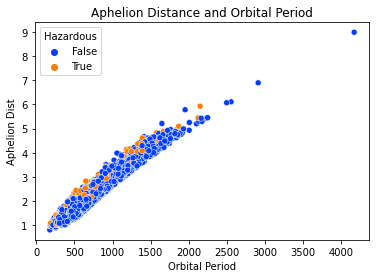

In [129]:
sns.scatterplot(
    x='Orbital Period', 
    y="Aphelion Dist",
    data=space_df,
    palette='bright',
    hue='Hazardous').set(title = 'Aphelion Distance and Orbital Period');

>In this chart we are looking at aplhelion distance (the maximum distance from the sun within its orbit) and the Orbital Period (amount of time the object takes to complete one orbit). I selected these two features because they have a correlation of .98. Which means they share a strong positive correlation. When one goes up so does the other. You can see that in the chart with the points all along a band stretching from the lower left to upper right. You can also see that even though the features are strongly correlated, that the target class of True is spread throughout.

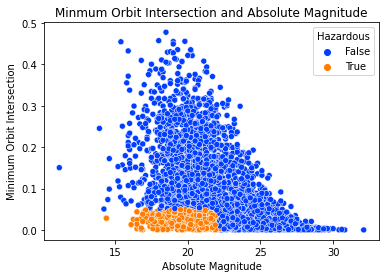

In [130]:
sns.scatterplot(
    x='Absolute Magnitude', 
    y="Minimum Orbit Intersection",
    data=space_df,
    palette='bright',
    hue='Hazardous');
plt.title('Minmum Orbit Intersection and Absolute Magnitude');

>In this chart is the comparison between Minimum Orbit Intersection (the smallest distance between two orbiting bodies) and Absolute Magnitude (a measurement of the brightness of an object). These features have a correlation of -.49. The most telling part of this chart is how the target class seems to be cut out of the many Near Earth Objects. These features appear to be very important in determining the target class of True.

###Modeling

###Normalizing skewed data

Transforming skewed features using np.log() 

*   I read about and adapted code from: https://towardsdatascience.com/feature-transformation-for-multiple-linear-regression-in-python-8648ddf070b8


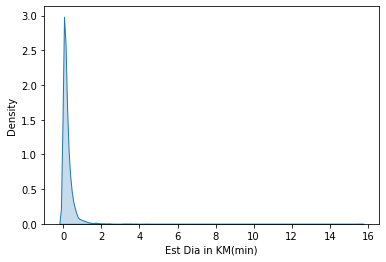

In [131]:
# Example of data before using np.log()
sns.kdeplot(space_df['Est Dia in KM(min)'], shade=True);

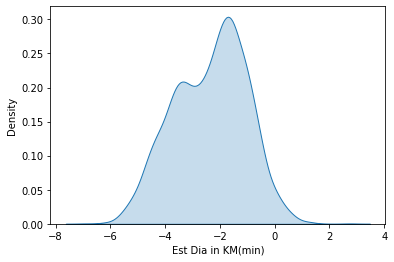

In [132]:
# Same column transformed with np.log()
log_example = np.log(space_df['Est Dia in KM(min)'])
sns.kdeplot(log_example, shade=True);

In [133]:
# Creating a list of the skewed features
skewed_features = ['Perihelion Time', 'Aphelion Dist', 'Orbital Period', 'Inclination',
                   'Semi Major Axis', 'Epoch Osculation', 'Minimum Orbit Intersection',
                   'Est Dia in KM(max)', 'Est Dia in KM(min)']

In [134]:
# Using a for loop to transform all identified columns using np.log()
for feature in skewed_features:
  space_df[feature] = np.log(space_df[feature])

###Preparing data and train/test split

In [135]:
# converting the target column to a numeric value
# because we are looking for hazards True will be a value of 1
space_df['Hazardous'] = space_df['Hazardous'].replace({True: 1, False: 0})
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Relative Velocity km per sec  4687 non-null   float64
 4   Miss Dist.(Astronomical)      4687 non-null   float64
 5   Orbit Uncertainity            4687 non-null   int64  
 6   Minimum Orbit Intersection    4687 non-null   float64
 7   Jupiter Tisserand Invariant   4687 non-null   float64
 8   Epoch Osculation              4687 non-null   float64
 9   Eccentricity                  4687 non-null   float64
 10  Semi Major Axis               4687 non-null   float64
 11  Inclination                   4687 non-null   float64
 12  Asc Node Longitude            4687 non-null   float64
 13  Orb

In [136]:
# Creating the features matrix
X = space_df.drop(columns=('Hazardous'))
# creating the target vector
y = space_df['Hazardous']

In [137]:
# preforming train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

###Baseline

Baseline - The features of Absolute Magnitude and Minimum Orbit Intersection appear to be key to predicting hazardous objects. Using just these two features I will establish a baseline model. Once the baseline is defined, I will try to beat the results with the remaining features.

In [138]:
# getting only key features for the baseline model
space_df_baseline = space_df[['Absolute Magnitude', 'Minimum Orbit Intersection', 'Hazardous']].copy()

#space_df_baseline['Hazardous'] = space_df_baseline['Hazardous'].replace({True: 1, False: 0})
# Creating the features matrix
X_baseline = space_df_baseline.drop(columns=('Hazardous'))
# creating the target vector
y_baseline = space_df_baseline['Hazardous']

In [139]:
# train test split on baseline dataset
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, random_state=42, stratify = y)

In [140]:
# Instantiate decision tree
tree = DecisionTreeClassifier(random_state=42)
# fitting the model
tree.fit(X_train_baseline, y_train_baseline)

DecisionTreeClassifier(random_state=42)

In [141]:
# reviewing the training and test score of the model (accuracy score)
print('Training Score of Decision Tree model', + tree.score(X_train_baseline, y_train_baseline))
print('Test Score of Decision Tree model', + tree.score(X_test_baseline, y_test_baseline))

Training Score of Decision Tree model 1.0
Test Score of Decision Tree model 1.0


>It turns out that the features of Absolute Magnitude and Minimum Orbit Intersection were very important. Too important because the baseline decision tree was able to perfectly predict the target. 

>Without these features I will use the remaining data to train and test another model to attempt to predict the target. 

###Preparing Modified Dataset

In [142]:
# dataset without the key features
space_df_without = space_df.copy()
space_df_without.drop(columns = ['Absolute Magnitude', 'Minimum Orbit Intersection'], inplace = True)

In [143]:
# creating features matrix and target vector
X_without = space_df_without.drop(columns = ('Hazardous'))

y_without = space_df_without['Hazardous']

In [144]:
# train test split on dataset without key features
#X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(X_without, y_without, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_without, y_without, random_state=42, stratify=y)

>During my data analysis I attempted different ways of addressing the target class imbalance. I used oversampling and undersampling in an attempt to improve model performance. Neither proved a benefit to the model performance.

In [145]:
# Instantiate StandardScaler
scaler = StandardScaler()

###Logistic Regression Model

In [146]:
# Intstantiate Logistic Regression Model
logistic_regression = LogisticRegression()
# creating pipeline for log reg model
logistic_regression_pipe = make_pipeline(scaler, logistic_regression)
# fitting the log reg pipe on train data
logistic_regression_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [147]:
# reviewing accuracy score on training and test data
print('Training Score of Logistic Regression model', + logistic_regression_pipe.score(X_train, y_train))
print('Test Score of Logistics Regression model', + logistic_regression_pipe.score(X_test, y_test))

Training Score of Logistic Regression model 0.8472261735419631
Test Score of Logistics Regression model 0.840443686006826


###KNN Model

In [148]:
# Instantiate KNN Model
knn = KNeighborsClassifier()
# creating pipeline for knn model
knn_pipe = make_pipeline(scaler, knn)
# fitting the model to the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [149]:
# reviewing the training and test score of the model (accuracy score)
print('Training Score of KNN model', + knn_pipe.score(X_train, y_train))
print('Test Score of KNN model', + knn_pipe.score(X_test, y_test))

Training Score of KNN model 0.9049786628733997
Test Score of KNN model 0.8575085324232082


###Random Forest Model

In [150]:
# Instantiate Random Forest Model
random_forest = RandomForestClassifier(random_state=42)
# creating pipeline for data and model
random_forest_pipe = make_pipeline(scaler, random_forest)
# fit the model with the training data
random_forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [151]:
# reviewing the training and test score of the model (accuracy score)
print('Training Score of Random Forest model', + random_forest_pipe.score(X_train, y_train))
print('Test Score of Random Forest model', + random_forest_pipe.score(X_test, y_test))

Training Score of Random Forest model 1.0
Test Score of Random Forest model 0.9300341296928327


In [152]:
est_depth = [estimator.get_depth() for estimator in random_forest.estimators_]
max(est_depth)

29

###XGBoost Model

In [153]:
# Instantiate XGBoost Model
xgb = XGBClassifier(random_state=42)
# creating a pipe for the model
xgb_pipe = make_pipeline(scaler, xgb)
# fitting the training data
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier', XGBClassifier(random_state=42))])

In [154]:
print('Training Score of XGB model', + xgb_pipe.score(X_train, y_train))
print('Test Score of XGB model', + xgb_pipe.score(X_test, y_test))

Training Score of XGB model 0.937126600284495
Test Score of XGB model 0.9155290102389079


###PCA

In [155]:
# Instantiate PCA
pca = PCA(n_components=.99)

In [156]:
# Using PCA on Random Forest
# creating a pipeline for pca
pca_rf_pipe = make_pipeline(scaler, pca, random_forest)
# fitting training data
pca_rf_pipe.fit(X_train, y_train)
# reviewing the training and test score of the model (accuracy score)
print('Training Score of the PCA Random Forest model', + pca_rf_pipe.score(X_train, y_train))
print('Test Score of the PCA Random Forest model', + pca_rf_pipe.score(X_test, y_test))

Training Score of the PCA Random Forest model 1.0
Test Score of the PCA Random Forest model 0.8762798634812287


In [157]:
# Using PCA on XGBoost
# creating a pipeline for pca
pca_xgb_pipe = make_pipeline(scaler, pca, xgb)
# fitting training data
pca_xgb_pipe.fit(X_train, y_train)
# reviewing the training and test score of the model (accuracy score)
print('Training Score of the PCA XGB model', + pca_xgb_pipe.score(X_train, y_train))
print('Test Score of the PCA XGB model', + pca_xgb_pipe.score(X_test, y_test))

Training Score of the PCA XGB model 0.9018492176386913
Test Score of the PCA XGB model 0.8686006825938567


>Using principal component analysis to reduce the number of features was not helpful in improving the accuracy score of the model.

###Tuning Random Forest and XGBoost Models

In [160]:
# creating a dictionary of hyperparameters for gridsearch and random forest
rf_params = {'max_depth': [3, 22, 29],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 4],
              'n_estimators': [100, 500],
              'max_features': [5, 10]}

In [162]:
# instantiate gridsearch with random forest and dictionary of params
rf_gridsearch = GridSearchCV(RandomForestClassifier(random_state=42), rf_params)
# fitting the data
rf_gridsearch.fit(X_train, y_train)
# getting a list of the best hyperparameters
rf_gridsearch.best_params_

{'max_depth': 22,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

{'max_depth': 22,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [163]:
#saving the best random forest model
best_rf = rf_gridsearch.best_estimator_
# train and fit best random forest model
best_rf.fit(X_train, y_train)
# reviewing the training and test score of the model (accuracy score)
print('Training Score of Best Random Forest model without key features', + best_rf.score(X_train, y_train))
print('Test Score of Best Random Forest model without key features', + best_rf.score(X_test, y_test))

Training Score of Best Random Forest model without key features 1.0
Test Score of Best Random Forest model without key features 0.9419795221843004


In [166]:
# gridsearch dictionary for XGBoost
xgb_params = {'max_depth': [3, 12, 22],
              'n_estimators': [100, 500, 1000]}

In [167]:
# creating an instance of gridsearchcv for xgboost
xgb_gridsearch = GridSearchCV(XGBClassifier(random_state=42), xgb_params)
# fittin the model
xgb_gridsearch.fit(X_train, y_train)
# printing the best hyperparameters
xgb_gridsearch.best_params_

{'max_depth': 12, 'n_estimators': 500}

In [168]:
# creating a variable for best params
best_xgb = xgb_gridsearch.best_estimator_
# fitting the best model
best_xgb.fit(X_train, y_train)
# reviewing the training and test score of the model (accuracy score)
print('Training Score of Best Random Forest model without key features', + best_xgb.score(X_train, y_train))
print('Test Score of Best Random Forest model without key features', + best_xgb.score(X_test, y_test))

Training Score of Best Random Forest model without key features 1.0
Test Score of Best Random Forest model without key features 0.9453924914675768


>The best model after tuning was XGBoost with an accuracy score of .94539

In [170]:
# generating predictions for best model
xgb_predictions = best_xgb.predict(X_test)

In [172]:
# creating and printing the classification report
xgb_classification = classification_report(y_test, xgb_predictions)
print(xgb_classification)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       983
           1       0.86      0.79      0.82       189

    accuracy                           0.95      1172
   macro avg       0.91      0.88      0.90      1172
weighted avg       0.94      0.95      0.94      1172



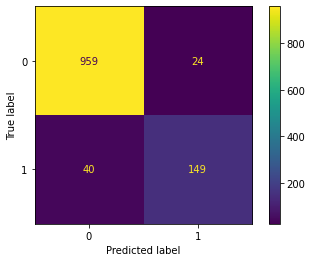

In [174]:
#creating confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, xgb_predictions);

###Conclusion
Analyzing the dataset without two key features was challenging. The model I would choose to protect the Earth would be the decision tree. Having model with 100% accuracy is critical. 

Evaluating the tuned models it is clear that they are unable to predict all hazardous near Earth objects. The best model that I was able to produce had 40 false negatives. That means that 40 times the model said an object would not hit Earth, but ended up crashing into Earth anyway. Clearly a mistake that cannot be made.